In [5]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

y.head()


,quality
0,5
1,5
2,5
3,6
4,5


In [6]:
#See information about columns
#The count of non-null rows is the same as the total count, indicating that there are no empty fields.

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
dtypes: float64(11)
memory usage: 558.5 KB


In [9]:
#Let's check the count of categorical features. We can determine the count of unique values in every column. If there are only a few, it could indicate that it's a categorical feature."""
#We see that our result includes our target variable, which indicates that 'quality' is a categorical variable."
unique_values = X.nunique()
unique_values_target = y.nunique()
categorical_columns = [col for col in X.columns if X[col].dtype == 'object' or unique_values[col] < 10]
categorical_columns.append([col for col in y.columns if y[col].dtype == 'object' or unique_values_target[col] < 10])
categorical_columns

[['quality']]

In [11]:
#Statistic of features
import pandas as pd
import matplotlib.pyplot as plt
from math import ceil

descriptive_stats_X = X.describe()
descriptive_stats_X


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


In [13]:
#Statistics of target
descriptive_stats_y = y.describe()
descriptive_stats_y

,quality
count,6497.000000
mean,5.818378
std,0.873255
min,3.000000
25%,5.000000
50%,6.000000
75%,6.000000
max,9.000000


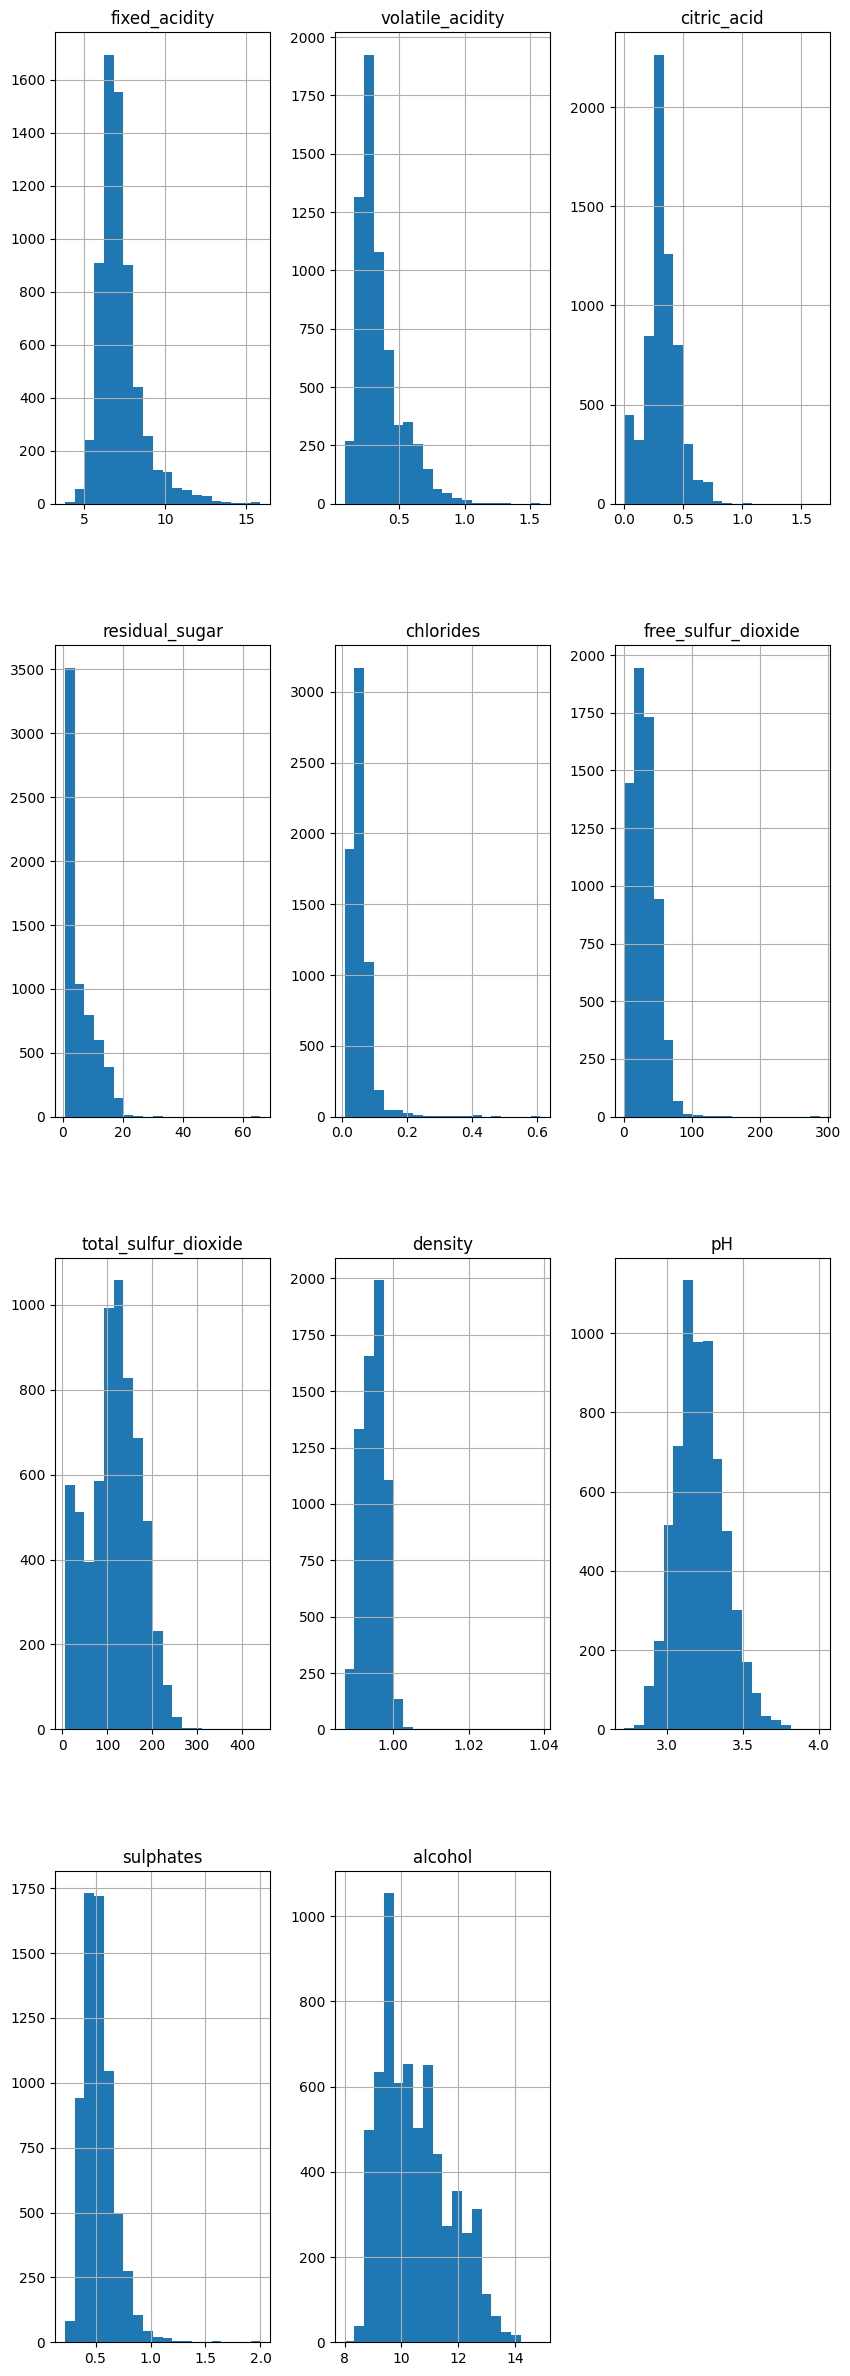

In [20]:
#Histograms for every feature
X.hist(bins=20, figsize=(10,30))
plt.show()

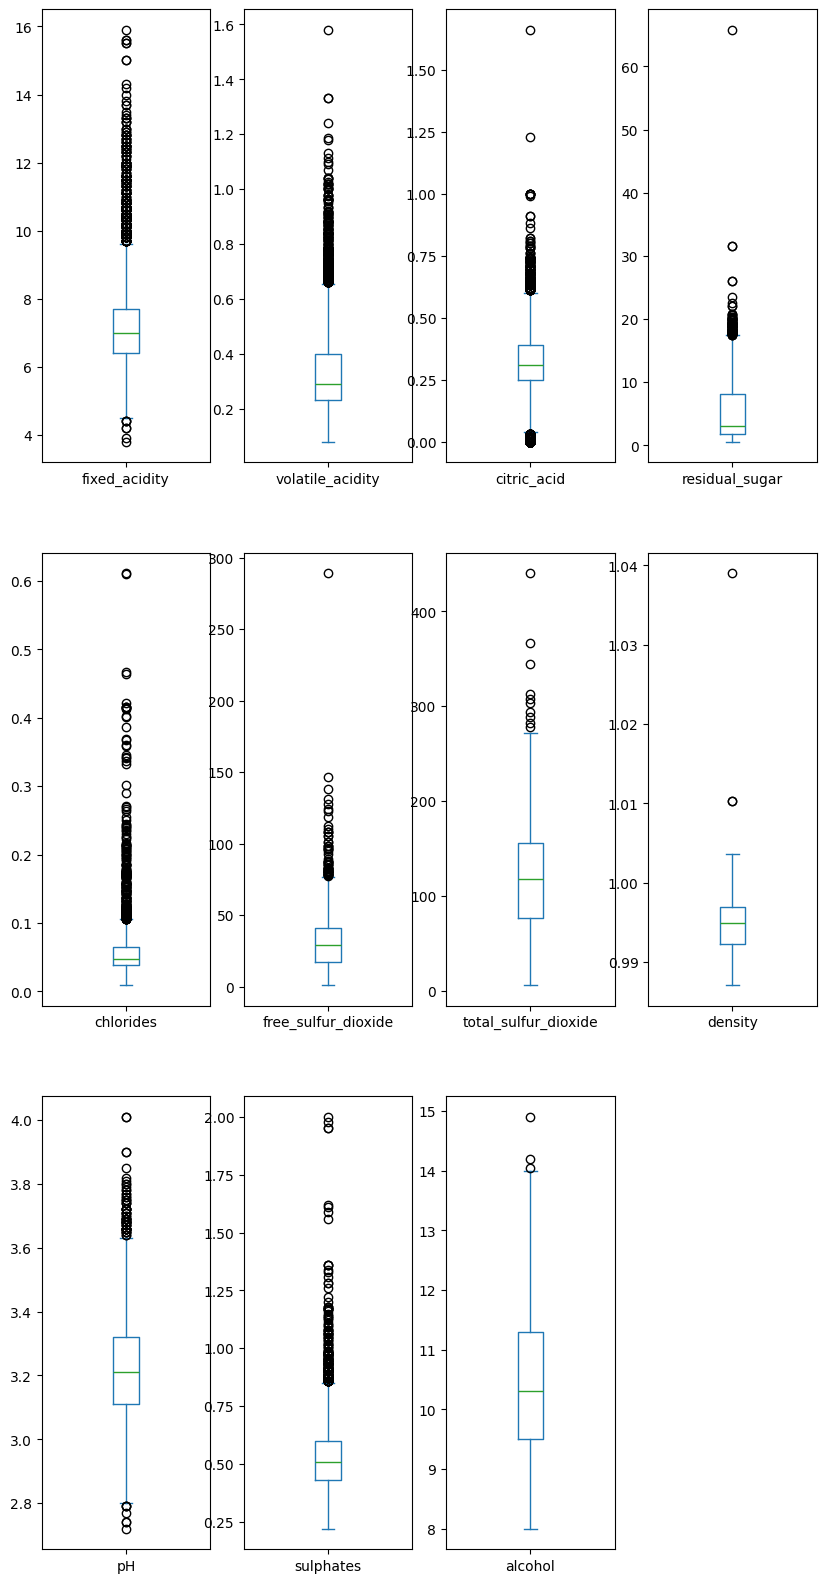

In [26]:
#Boxplots for every feature
"""
Fixed Acidity: The median value is relatively low compared to the maximum value, indicating a skewed distribution towards lower values. There are some emissions from above.
Volatile Acidity: The median is towards the bottom of the box, which also indicates positive skewness (most values are concentrated at the bottom of the range).
Citric Acid: The distribution appears to be more symmetric than for other variables, with fewer outliers.
Residual Sugar: Large number of outliers and large interquartile range, indicating high variability and potentially a log-normal distribution.
"""
X.plot(kind='box', subplots=True, layout=(ceil(X.shape[1] / 4), 4), figsize=(10,20))
plt.show()

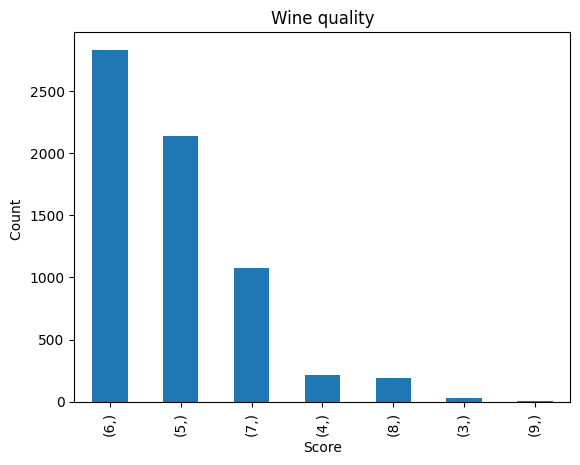

In [21]:
#Histogram for target
y.value_counts().plot(kind='bar')
plt.title('Wine quality')
plt.xlabel('Score')
plt.ylabel('Count ')
plt.show()

In [25]:


pearson_corr = X.corr()

spearman_corr_with_y = X.apply(lambda col: col.corr(y, method='spearman'))

spearman_corr_with_y_df = spearman_corr_with_y.to_frame(name='y_spearman')


combined_corr = pearson_corr.join(spearman_corr_with_y_df)
combined_corr



,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,y_spearman
fixed_acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.098154
volatile_acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.257806
citric_acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.105711
residual_sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.016891
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.295054
free_sulfur_dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.086865
total_sulfur_dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.054777
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.322806
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.032538
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.029831


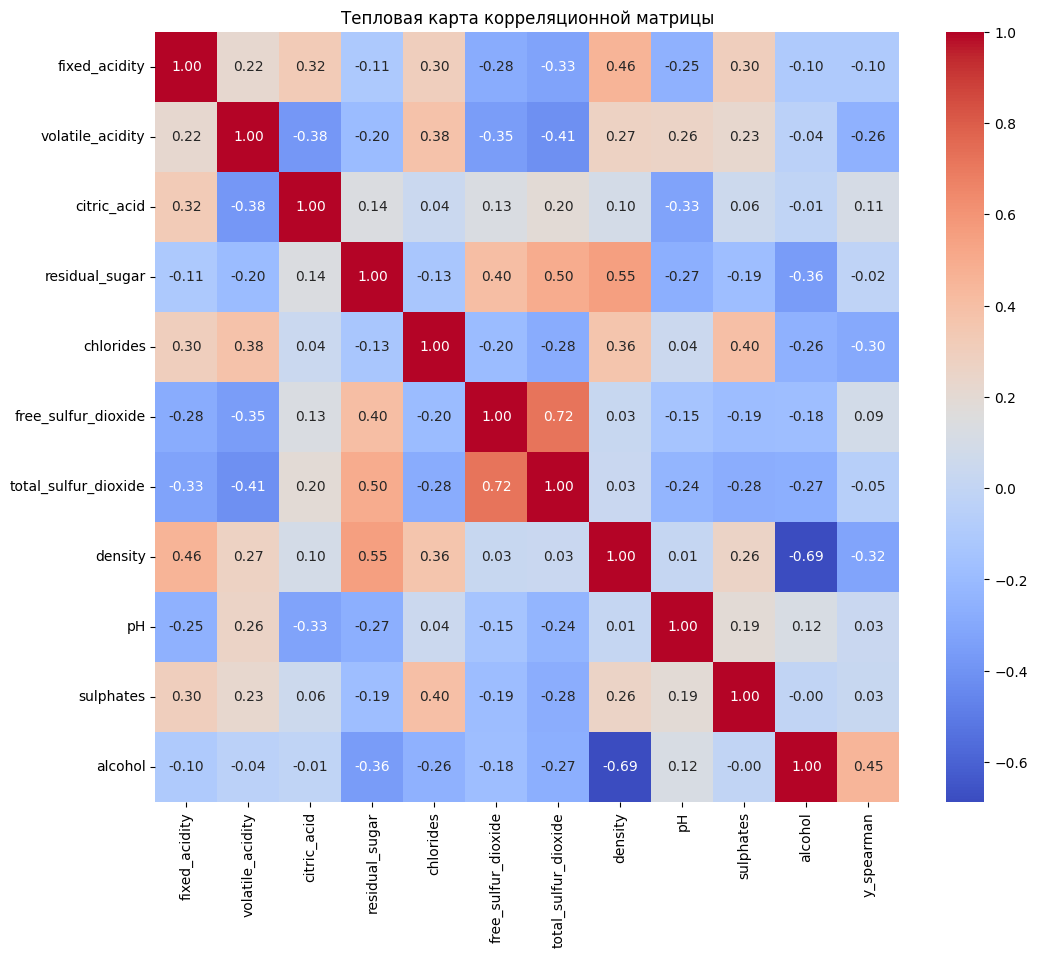

In [27]:
"""
The most significant correlations with y_spearman appear in the variables alcohol (0.45), density (-0.32), and chlorides (-0.30). This means that alcohol level is positively correlated with wine quality, while gravity and chloride content are negatively correlated with quality.
The remaining variables have a weaker correlation with the target variable.
"""
import seaborn as sns
plt.figure(figsize=(12, 10))
sns.heatmap(combined_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Тепловая карта корреляционной матрицы')
plt.show()

In [30]:
"""
a new attribute sulfur_dioxide_ratio has been added to the DataFrame. This feature is the ratio of free_sulfur_dioxide to total_sulfur_dioxide, which can be useful when building machine learning models because this ratio may have a stronger relationship with the target variable than either feature alone.
"""
X.loc[:, 'free_to_total_sulfur_ratio'] = X['free_sulfur_dioxide'] / X['total_sulfur_dioxide']

X


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,free_to_total_sulfur_ratio
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0.323529
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0.373134
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0.277778
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0.283333
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0.323529
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,0.260870
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0.339286
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,0.270270
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,0.181818


In [31]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
X




,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,free_to_total_sulfur_ratio
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0.323529
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0.373134
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0.277778
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0.283333
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0.323529
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,0.260870
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0.339286
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,0.270270
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,0.181818


In [32]:
"""
80 percent is training data
10 percent - validation
10 percent - test
"""
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)



In [37]:
"""

1. **Coefficient of Determination (R^2)**: The value of \(R^2\) is approximately 0.27, which indicates that the model does not explain the variability in the target variable very well. Typically a \( R^2 \) close to 1 indicates a better model fit, so there is significant room for improvement.

2. **Mean square error (MSE)**: MSE value is about 0.51. This value tells you how large the squared errors of the model are. The closer the MSE value is to zero, the better, so a value of 0.51 could be a sign that the model is making significant prediction errors.
3. **Mean Absolute Error (MAE)**: An MAE of about 0.55 indicates the average absolute deviation of the model's predictions from the actual values. This means that, on average, the model's predictions deviate from the true values by about 0.55 units of the target variable.

4. **Root Mean Square Error (RMSE)**: RMSE around 0.71 provides information about the average size of model errors; this measure is the most understandable because it returns to the original units of measurement of the target variable.
"""


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, root_mean_squared_error

def calculate_regression_metrics(y_true, y_pred):
    metrics = {
        'R^2': r2_score(y_true, y_pred),
        'MSE': mean_squared_error(y_true, y_pred),
        'MAE': mean_absolute_error(y_true, y_pred),
        'RMSE': root_mean_squared_error(y_true, y_pred)
    }
    return metrics




model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

metrics = calculate_regression_metrics(y_test, y_pred)
metrics




{'R^2': 0.2679348004711134,
 'MSE': 0.5142719040969743,
 'MAE': 0.5460970767138374,
 'RMSE': 0.7171275368419304}

In [38]:
#We  don't see big changes in metrics
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Ridge

parameters = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

ridge_model = Ridge()

grid_search = GridSearchCV(ridge_model, parameters, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)


regression_metrics = calculate_regression_metrics(y_test, y_pred)
regression_metrics


{'R^2': 0.26756572316951055,
 'MSE': 0.5145311789358499,
 'MAE': 0.5461502245561216,
 'RMSE': 0.7173082872348889}

In [66]:
"""
In addition to R2R2, MSE and RMSE also decreased, indicating smaller mean square errors of model predictions. MAE also decreased, indicating a decrease in the average magnitude of prediction error.
"""
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline


poly_degree = 2


polynomial_features = PolynomialFeatures(degree=poly_degree, include_bias=False)


pipeline = Pipeline([
    ("polynomial_features", polynomial_features),
    ("linear_regression", LinearRegression())
])


pipeline.fit(X_train, y_train)


y_pred = pipeline.predict(X_test)


regression_metrics = calculate_regression_metrics(y_test, y_pred)
regression_metrics


{'R^2': 0.31294060522750533,
 'MSE': 0.4826555659314923,
 'MAE': 0.5379057334681784,
 'RMSE': 0.6947341692557609}

In [84]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


alpha = 1


pipeline = Pipeline([
    ("polynomial_features", PolynomialFeatures(degree=2, include_bias=False)),
    ("ridge_regression", Ridge(alpha=alpha))
])

pipeline.fit(X_train, y_train)


y_pred = pipeline.predict(X_test)

regression_metrics = calculate_regression_metrics(y_test, y_pred)
regression_metrics

{'R^2': 0.3037709757210284,
 'MSE': 0.4890971818274458,
 'MAE': 0.5404160387316177,
 'RMSE': 0.6993548325617303}

In [86]:
"""
Максимальное значение r squared не получается выше 0.3.
Пытался убрать фичи у которых корреляция меньше 0.1 и больше -0.1, но заметного эффекта не получилось
Точно так же использовалас регуляризация Риджа. Скорее всего причина-большое количество выбросов,что видно на boxplots.
"""
threshold = 0.1


significant_features = spearman_corr_with_y[abs(spearman_corr_with_y) > threshold].index.tolist()


X_train_significant = X_train[significant_features]
X_test_significant = X_test[significant_features]

pipeline.fit(X_train_significant, y_train)
y_pred = pipeline.predict(X_test_significant)


regression_metrics = calculate_regression_metrics(y_test, y_pred)
regression_metrics


{'R^2': 0.2603489492063429,
 'MSE': 0.5196009242124511,
 'MAE': 0.5600767152566253,
 'RMSE': 0.7208334927099677}